# Simple implementation af Kalman filteret
Koden er nu skrevet sådan at $F$ er afhængig af tid, da vores koordinater indgår i dens udregning. Vi skal have nogle anre ligninger i spil for at kunne lave den uden det
<br>
<b>OBS OBS OBS OBS OBS</b> <br>
<b>Læs ovenfor</b>
\begin{align*}
    \intertext{kinematic and observations model}
    \mathbf{x}[n]&=\Phi \mathbf{x}[n-1] + \mathbf{u}[n], \\
    \mathbf{z}[n]&=\mathbf{x}[n] + \mathbf{w}[n],\\
    \intertext{the prediction and prediction mean square error,}
    \hat{\mathbf{x}}[n|n-1]&=\Phi\hat{\mathbf{x}}[n-1|n-1], \\
    M[n|n-1]&=\Phi M[n-1|n-1]\Phi^\top + S_{\mathbf{u}}, \\
    \intertext{the Kalman gain,}
    K[n]&=M[n|n-1](S_{\mathbf{w}}+M[n|n-1])^{-1},\\
    \intertext{and the correction and estimate mean square error,}
    \hat{\mathbf{x}}[n|n]&=\hat{\mathbf{x}}[n|n-1]+K[n](\mathbf{z}[n]-\hat{\mathbf{x}}[n|n-1]),\\
    M[n|n]&=(I-K[n])M[n|n-1].
\end{align*}
<br>

Lav lin. regr. på positionen, og hent hastigheden ud fra det. Så lav vinduer så det kan bruges til live tracking

In [1]:
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import importlib
from scipy.signal import resample
sys.path.insert(1, os.getcwd())
import tracking as tr
importlib.reload(tr)

<module 'tracking' from '/home/anders/Documents/AAU/P6/tracking/tracking.py'>

In [2]:
velocity, distance, dt = tr.velocity_algo("truth1.txt", true_orbit=True)
x_state = np.concatenate((distance, velocity), axis=1)

cov_w, cov_u = [100*np.eye(6)]*2
x_initial_guess, M_initial_guess = np.ones(6), np.eye(6)
kf = tr.Kalman(cov_u, cov_w, x_initial_guess, M_initial_guess, dt)
kf.run_sim(x_state)

In [3]:
names, vals = kf.get_data()
kalman_predictions = vals[1]

In [4]:
__true_orbit = tr.velocity_algo("entireOrbit1_reduced.txt", true_orbit=True)
true_orbit = np.hstack((__true_orbit[1], __true_orbit[0]))

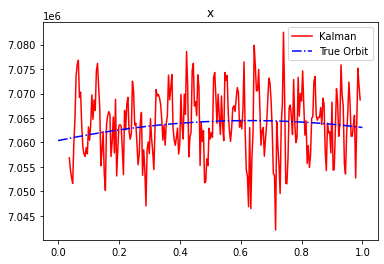

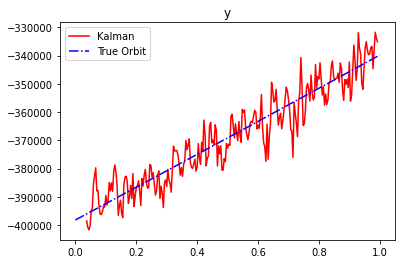

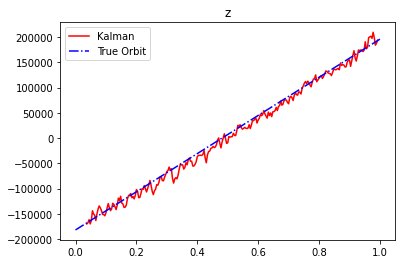

In [5]:
xlims = (np.min(true_orbit[:, 0]), np.max(true_orbit[:, 0]))
ylims = (np.min(true_orbit[:, 1]), np.max(true_orbit[:, 1]))
zlims = (np.min(true_orbit[:, 2]), np.max(true_orbit[:, 2]))

t_short = np.linspace(0, 1, len(kalman_predictions[:,0]))
t_long = np.linspace(0, 1, len(true_orbit[:,0]))

plt.title("x")
plt.plot(t_short[10:-2], kalman_predictions[10:-2, 0], c='r', label="Kalman")
plt.plot(t_long, true_orbit[:, 0], c='b', ls="-.", label="True Orbit")
plt.legend()
# plt.ylim(xlims)
plt.show()

plt.title("y")
plt.plot(t_short[10:-2], kalman_predictions[10:-2, 1], c='r', label="Kalman")
plt.plot(t_long, true_orbit[:, 1], c='b', ls="-.", label="True Orbit")
plt.legend()
# plt.ylim(ylims)
plt.show()

plt.title("z")
plt.plot(t_short[10:-2], kalman_predictions[10:-2, 2], c='r', label="Kalman")
plt.plot(t_long, true_orbit[:, 2], c='b', ls="-.", label="True Orbit")
plt.legend()
# plt.ylim(zlims)
plt.show()

In [6]:
true_t = np.cumsum(__true_orbit[2])
fake_t = np.cumsum(dt)
indeces = np.digitize(fake_t, true_t)-1

err_x = (kalman_predictions[1:-1, 0] - true_orbit[indeces, 0])
err_y = (kalman_predictions[1:-1, 1] - true_orbit[indeces, 1])
err_z = (kalman_predictions[1:-1, 2] - true_orbit[indeces, 2])

plt.plot(err_x[5:-5], label="x_error")
plt.legend()
plt.show()

plt.plot(err_y[5:-5], label="y_error")
plt.legend()
plt.show()

plt.plot(err_z[5:-5], label="z_error")
plt.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (269,) (271,) 